In [1]:
from src import csv_handlers, data_retrieval, string_handlers
import numpy as np
import pandas as pd

In [10]:
#data_retrieval.download_bulk_in_batches("2014-01-01", "2020-01-01", "data_full", award_types=["contracts"])

In [11]:
#csv_handlers.extract_all_recipients("data_full")

In [2]:
df = csv_handlers.get_recipient_data_from_csv("data/all_recipients.csv")
df.shape

2020-01-30 23:25:20,385 - src.csv_handlers - DEBUG - Reading file: data/all_recipients.csv


(2594379, 25)

In [3]:
#df = df[0:500000]
companies = np.concatenate([df.recipient_name.dropna().unique(),df.recipient_parent_name.dropna().unique(),
                            df.recipient_doing_business_as_name.dropna().unique()])
companies = pd.Series(pd.Series(companies).unique())
print(companies.shape)
companies = pd.Series(string_handlers.fix_letters(companies).unique())
print(companies.shape)
companies = pd.Series(string_handlers.fix_words(companies).unique())
print(companies.shape)

(583553,)
(456084,)
(445125,)


In [4]:
companies.head()

0                ALMAGUER FRANK
1    AMER K9 DETECTION SVCS LLC
2      NATL ACADEMY OF SCIENCES
3    LINXX GLOBAL SOLUTIONS INC
4                       ARD INC
dtype: object

In [5]:
clean_recipient_name = string_handlers.fix_letters(df.recipient_name)
df['clean_recipient_name'] = string_handlers.fix_words(clean_recipient_name)
clean_recipient_parent_name = string_handlers.fix_letters(df.recipient_parent_name)
df['clean_recipient_parent_name'] = string_handlers.fix_words(clean_recipient_parent_name)
clean_recipient_doing_business_as_name = string_handlers.fix_letters(df.recipient_doing_business_as_name)
df['clean_recipient_doing_business_as_name'] = string_handlers.fix_words(clean_recipient_doing_business_as_name)

In [ ]:
df.to_csv('processed_df')

In [6]:
df.head()

,recipient_duns,recipient_name,recipient_doing_business_as_name,recipient_parent_name,recipient_parent_duns,recipient_country_code,recipient_country_name,recipient_address_line_1,recipient_address_line_2,recipient_city_name,...,recipient_county_name,recipient_zip_code,recipient_zip_last_4_code,recipient_foreign_city_name,recipient_foreign_province_name,recipient_foreign_postal_code,recipient_count,clean_recipient_name,clean_recipient_parent_name,clean_recipient_doing_business_as_name
0,124662987,"ALMAGUER, FRANK",NaN,ALMAGUER FRANK,124662987.0,USA,UNITED STATES,1503 DULCIMER COURT,NaN,VIENNA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALMAGUER FRANK,ALMAGUER FRANK,NaN
1,139368364,"AMERICAN K-9 DETECTION SERVICES, LLC",NaN,AMERICAN K-9 DETECTION SERVICES LLC,966133477.0,USA,UNITED STATES,1791 O G SKINNER DR,NaN,WEST POINT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AMER K9 DETECTION SVCS LLC,AMER K9 DETECTION SVCS LLC,NaN
2,41964057,NATIONAL ACADEMY OF SCIENCES,NaN,NATIONAL ACADEMY OF SCIENCES OF THE UNITED STA...,41964057.0,USA,UNITED STATES,2101 CONSTITUTION AVE NW,NaN,WASHINGTON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NATL ACADEMY OF SCIENCES,NATL ACADEMY OF SCIENCES OF THE UTD STATES OF ...,NaN
3,3277089,"LINXX GLOBAL SOLUTIONS, INC.",NaN,LINXX GLOBAL SOLUTIONS INC.,3277089.0,USA,UNITED STATES,272 BENDIX RD STE 220,NaN,VIRGINIA BEACH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LINXX GLOBAL SOLUTIONS INC,LINXX GLOBAL SOLUTIONS INC,NaN
4,829085617,"ARD, INC.",NaN,TETRA TECH INC.,45224250.0,USA,UNITED STATES,605 MARKET ST STE 800,NaN,SAN FRANCISCO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARD INC,TETRA TECH INC,NaN


# Lisa DF

In [7]:
from nltk.text import TextCollection
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import seaborn as sns

In [8]:
lisa_df = pd.read_excel("company_dataset_identifier.xlsx")

In [9]:
cleaned= string_handlers.fix_letters(lisa_df.conm)
lisa_df['cleaned']= string_handlers.fix_words(cleaned)
lisa_df.head()

,gvkey,conm,conml,state,add1,add2,add3,add4,addzip,cleaned
0,1000,A & E PLASTIK PAK INC,A & E Plastik Pak Inc,NaN,NaN,NaN,NaN,NaN,NaN,A&E PLASTIK PAK INC
1,1001,A & M FOOD SERVICES INC,A & M Food Services Inc,OK,1924 South Utica Avenue,NaN,NaN,NaN,94104,A&M FOOD SVCS INC
2,1002,AAI CORP,AAI Corp,MD,124 Industry Lane,NaN,NaN,NaN,21030-0126,AAI CORP
3,1003,A.A. IMPORTING CO INC,A.A. Importing Co Inc,MO,7700 Hall Street,NaN,NaN,NaN,63125,AA IMPORTING CO INC
4,1004,AAR CORP,AAR Corp,IL,"One AAR Place, 1100 North Wood Dale Road",NaN,NaN,NaN,60191,AAR CORP


In [10]:
df.notnull().sum()

recipient_duns                            2390754
recipient_name                            2594120
recipient_doing_business_as_name            97296
recipient_parent_name                     2219373
recipient_parent_duns                     2244095
recipient_country_code                    2593937
recipient_country_name                    2036149
recipient_address_line_1                  2539183
recipient_address_line_2                    69835
recipient_city_name                       2561104
recipient_state_code                      2471461
recipient_state_name                      2022255
recipient_zip_4_code                      2128148
recipient_congressional_district          1980924
recipient_phone_number                    1883499
recipient_fax_number                      1634563
recipient_city_code                        398109
recipient_county_code                      432147
recipient_county_name                      431964
recipient_zip_code                         412979


In [11]:
lisa_df.notnull().sum()

gvkey      28816
conm       28816
conml      28816
state      28011
add1       26927
add2         189
add3          12
add4           2
addzip     26928
cleaned    28816
dtype: int64

In [12]:
b = df.recipient_zip_4_code.str.contains('-').dropna()
x = df.iloc[b[b].index].recipient_zip_4_code
a = lisa_df.addzip.str.contains('-').dropna()
y = lisa_df.iloc[a[a].index].addzip
len(df.recipient_zip_4_code.unique()) + len(lisa_df.addzip.unique()) - len(pd.concat([df.recipient_zip_4_code,lisa_df.addzip]).unique())

5175

In [13]:
vectorizer = TfidfVectorizer(analyzer='word', token_pattern= r'\S+')
#tfidf = vectorizer.fit_transform(lisa_df.conm)
vectorizer.fit(pd.concat([lisa_df.cleaned, pd.Series(companies)]).unique())
tfidf = vectorizer.transform(lisa_df.cleaned)
tfidf_USA = vectorizer.transform(companies)

In [14]:
cosine_similarities = linear_kernel(tfidf, tfidf_USA, dense_output=False)
cosine_similarities.shape

(28816, 445125)

In [ ]:
#cosine_similarities =  [cosine_similarities>0.5] #returns 1d result need to, should be 2d
#cosine_similarities.shape
#cosine_similarities.save_npz('cosine_similarities') # will take too much space without [cosine_similarities>0.5]

In [15]:
values = np.zeros(cosine_similarities.shape[0])
indexes = np.zeros(cosine_similarities.shape[0])

for i in range(cosine_similarities.shape[0]):
    dense = cosine_similarities[i].todense().T
    #print(dense.shape)
    index = np.argmax(dense)
    value = dense[index]
    indexes[i] = index
    values[i] = value
    if i % 1000 == 0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000


## all data

(6870, 1502, (28816,))


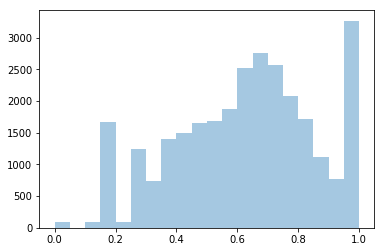

In [16]:
sns.distplot(values, kde=False, bins=20)
print((sum(values > 0.8), sum(values == 1), values.shape))

In [ ]:
# sum(values >= 0.6)

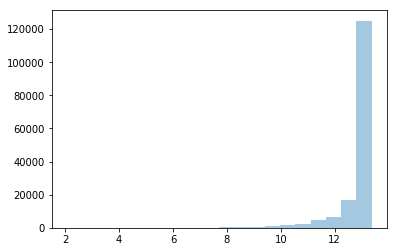

In [17]:
sns.distplot(vectorizer.idf_, kde=False, bins=20)

# Match results

In [19]:
some = np.logical_and(values>0.6, values<0.8)
sum(some)

9919

In [20]:
pd.concat([companies[indexes[some].astype('int')].reset_index(),
           lisa_df.cleaned[some].reset_index()],axis=1).sample(20)

,index,0,index,cleaned
6554,144723,AFFILIATED SVCS INC,17588,AFFILIATED CMNTY BANCORP
6576,165386,HI LINE DISTRIBUTORS INC,17647,FULL LINE DISTRIBUTORS INC
720,440077,CIMARRON,1812,CIMARRON CORP DEL
5979,33832,BIOLOGICS INC,15908,UNIVAX BIOLOGICS INC
1069,43938,REALTY INC,2700,DIVERSIFIED REALTY INC
5872,428244,HOME CARE AMERICA,15557,HOME SOLUTIONS AMERICA INC
9031,208597,BRIGHTSTAR CONSTRUCTION,24910,BRIGHTSTAR CORP REDH
4663,128567,PRINCETON MEDICAL GRP INC,11920,PRINCETON MEDIA GRP INC
4813,121643,MET PRO CORP,12376,MET CAPITAL CORP
6101,167751,FED CORP,16261,MIDWEST FED FINL CORP


In [21]:
#print(tfidf_USA[182421])

In [22]:
vectorizer.vocabulary_, len(vectorizer.vocabulary_)

({'a&e': 3757,
  'plastik': 112770,
  'pak': 108461,
  'inc': 70110,
  'a&m': 3768,
  'food': 54263,
  'svcs': 138817,
  'aai': 3887,
  'corp': 34735,
  'aa': 3829,
  'importing': 69973,
  'co': 31873,
  'aar': 3954,
  'aba': 4028,
  'inds': 70356,
  'abc': 4124,
  'abkco': 4291,
  'abm': 4308,
  'computer': 33268,
  'systems': 139651,
  'abs': 4403,
  'acf': 4843,
  'holding': 66586,
  'acs': 5071,
  'enterprises': 48199,
  'adc': 5348,
  'telecommunications': 141834,
  'addsco': 5411,
  'adi': 5514,
  'electronics': 46538,
  'aec': 5929,
  'ael': 5964,
  'cl': 30973,
  'a': 3745,
  'aes': 6216,
  'technology': 141358,
  'afa': 6260,
  'protective': 115859,
  'afg': 6328,
  'afp': 6368,
  'imaging': 69680,
  'agm': 6623,
  'ags': 6772,
  'computers': 33278,
  'aia': 6955,
  'aic': 6961,
  'intl': 72096,
  'aid': 6968,
  'del': 39450,
  'aim': 7025,
  'cos': 34913,
  'telephones': 141942,
  'ain': 7045,
  'leasing': 84301,
  'aits': 7313,
  'aj': 7328,
  'akf': 7453,
  'foods': 54285,


In [23]:
#vectorizer.get_feature_names()[2705]